# Noisy Quantum Circuit

[![Download Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/mindspore_noise.ipynb)&emsp;
[![Download Code](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/mindspore_noise.py)&emsp;
[![View source on Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/docs/blob/master/docs/mindquantum/docs/source_en/noise.ipynb)

## Overview

In real quantum devices, due to the immaturity of the technology at this stage, quantum systems can generate noise due to various factors such as quantum operation and environmental effects. The impact of noise on quantum devices cannot be ignored at this stage, therefore adding simulation of noise to quantum circuits can help us find quantum algorithms that are robust to noise, or design error correction schemes that reduce the impact of noise.

There are two types of noise: coherent noise and incoherent noise. Coherent noise generally originates from the noisiness of the parameters in the gate operation, and is therefore the unitary evolution and easy to simulate; incoherent noise originates from the interaction between the system and the environment, and is therefore usually non-unitary evolution, which changes the quantum system from a pure state to a mixed state, a process also known as quantum channel. Quantum systems of mixed states are usually represented in the form of density matrices, but statistical simulations can also be obtained by the "sampling-statistics" Monte Carlo method. In MindSpore Quantum, we use Monte Carlo method to simulate the quantum channel, where the noisey gate affects the qubits with certain probability, and by sampling the circuit several times, we can get the simulation results of the noisey quantum circuit.

The mathematical representation of the quantum channel is as follows:

$$
\varepsilon(\rho) =\sum_{k=0}^{m-1} E_{k} \rho E_{k}^{\dagger}
$$

Here $\{E_k\}$ are Kraus operators, which need to satisfy the Completeness conditions $\sum_k E_k^\dagger E_k= I$. $\rho$ is the density matrix of the quantum state. $\varepsilon(\rho)$ is the evolved quantum state.

## Pauli Channel

The effect of one class of noise on the quantum circuit is reflected by the probability that the circuit is additionally affected by a Pauli gate when some quantum operation is performed, and is called a Pauli channel. For example, after a certain operation the qubit is additionally acted upon with a certain probability by an `X` gate, i.e. the qubit is flipped with a certain probability, which is the Bit Flip Channel. Its mathematical representation is

$$
\varepsilon_{BF}( \rho ) =(1-p)I \rho I +pX \rho X
$$

Here $I$ is the unit matrix. $X$ is Pauli `X` gate. The Kraus operator corresponding to this channel is

$$
E_0=\sqrt{1-p}\begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}, E_{1} =\sqrt{p}\begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}
$$

Here $p$ can be considered as the probability of a bit flip occurring. From this example, it can be seen that a pure quantum state changes to a mixed state after a bit flip channel, which consists of the original state and the state after the bit flip.

Similarly, if the qubits are acted upon with a certain probability an additional `Z` gate is called a phase flip channel and the `Y` gate is a bit phase flip channel. If the three gates `X`, `Y`, and `Z` share the probability equally, it is called a depolaring channel, which is often used to describe the noise generated by gate operations in real quantum hardware. In addition, the probabilities of the three Pauli gates can also be customized using the generic Pauli channel.

The following is mathematical representations of these channels.

Pauli Channel:

$$
\varepsilon _{Pauli}( \rho ) =(1-p_x-p_y-p_z)\rho + p_x X \rho X+ p_y Y \rho Y+p_z Z \rho Z
$$

Phase Flip Channel:

$$
\varepsilon _{PF}( \rho ) =(1-p)\rho +pZ \rho Z
$$

Bit-Phase Flip Channel:

$$
\varepsilon _{BPF}( \rho ) =(1-p)\rho +pY \rho Y
$$

Depolarizing Channel:

$$
\varepsilon _{DF}( \rho ) =(1-p)\rho + \frac{p}{3}(X \rho X+ Y \rho Y+Z \rho Z)
$$

Next we will take an example of a depolaring channel and see how the noisy channel can be added to the circuit.

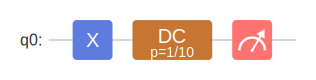

In [9]:
from mindquantum.core.gates import DepolarizingChannel, X
from mindquantum.core.circuit import Circuit

circ = Circuit()
circ += X.on(0)
circ += DepolarizingChannel(0.1).on(0)
circ.measure(0)
circ.svg()

Now we successfully build a single-qubit quantum circuit that is subject to depolaring noise after acting the `X` gate on it. This is expressed as a 10% probability of acting an additional Pauli gate, where `X`, `Y`, and `Z` gates share the probability equally.

Now we run 1000 simulations of the circuit and output the sampling results.

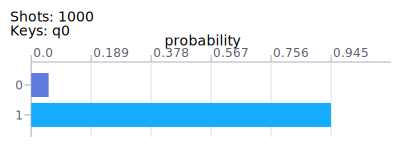

In [10]:
from mindquantum.simulator import Simulator

sim = Simulator('mqvector', 1)
result = sim.sampling(circ, shots=1000)
result.svg()

If there were no noise effects, the quantum state should be in the $|1\rangle$ state with all 1 as measurement results. But in the above results, about 7% of the simulations are 0, which is the effect from the depolaring channel. The sampling results are consistent with the predicted results of the expected 3.3% probability of additional action `X` gate, `Y` gate and `Z` gate.

Now we have completed a simulation of a quantum circuit with the depolaring noise.

## Damping Channel

Amplitude Damping Channel and Phase Damping Channel are also the more common channels. The amplitude damping channel describes the dissipation of energy in the quantum system, and the phase damping channel describes the loss of quantum information in the system. Specifically, the amplitude damping channel causes the qubit to return from the excited state to the ground state, and the phase damping channel causes the qubit to fall back from the superposition state to the collapsed state.

The expression of amplitude damping channel is

$$
\varepsilon_{AD}( \rho ) =E_{0} \rho E_{0}^{\dagger } +E_{1} \rho E_{1}^{\dagger }
$$

Here $E_{0}, E_{1}$ are Kraus operators.

$$
E_{0} =\begin{bmatrix}
1 & 0\\
0 & \sqrt{1-\gamma }
\end{bmatrix}, E_{1} =\begin{bmatrix}
0 & \sqrt{\gamma }\\
0 & 0
\end{bmatrix}
$$

$\gamma$ is the dissipation factor.

The expression of phase damping channel is

$$
\varepsilon_{PD}( \rho ) =E_{0} \rho E_{0}^{\dagger } +E_{1} \rho E_{1}^{\dagger }
$$

Here

$$
E_{0} =\begin{bmatrix}
1 & 0\\
0 & \sqrt{1-\gamma }
\end{bmatrix}, E_{1} =\begin{bmatrix}
0 & 0\\
0 & \sqrt{\gamma }
\end{bmatrix}
$$

$\gamma$ is the loss factor.

From the above two equations, it can be found that the Kraus operators of the damping channel do not have the unitarity, so the damping channel cannot be expressed in the form of a quantum gate acting with a certain probability.

Next we look at the effects of the two damping channels, starting with the amplitude damping channel.

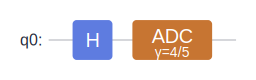

In [11]:
from mindquantum.core.gates import AmplitudeDampingChannel, H

circ2 = Circuit()
circ2 += H.on(0)
circ2 += AmplitudeDampingChannel(0.8).on(0)
circ2.svg()

In [12]:
# Evolve the circuit 5 times and print the quantum state
for i in range(5):
    sim.reset()                 # Initialize the simulator
    sim.apply_circuit(circ2)    # Evolve the circuit
    print(sim.get_qs(ket=True)) # Get the quantum state
    print()

0.912870929175277¦0⟩
0.408248290463863¦1⟩

0.912870929175277¦0⟩
0.408248290463863¦1⟩

1¦0⟩

1¦0⟩

1¦0⟩



From the above sampling results, it can be seen that the amplitude damping channel acts on the superposition $|\psi\rangle=|0\rangle+|1\rangle$ state to change it into a mixed state, one part of which is the $|0\rangle$ state and the other part is still the superposition state, but the amplitude of the $|1\rangle$ state is decayed. The proportion of this mixed state is determined by both the initial quantum state and the dissipation factor $\gamma$. The larger the amplitude of the $|1\rangle$ state in the initial quantum state, the larger the proportion of the $|0\rangle$ state in the mixed state.

Specifically, for the initial quantum state $|\psi\rangle=a|0\rangle+b|1\rangle$, after the amplitude damping channel it becomes the state $|0\rangle$ with probability $p=\gamma b^2$ or the superposition state $|\psi'\rangle=\frac{1}{\sqrt{1-\gamma b^{2}}}(a|0\rangle+b\sqrt{1-\gamma}|1\rangle)$ with probability $(1-p)$.

This shows that the qubits undergo energy dissipation after passing through the amplitude damping channel and the portion of the excited $|1\rangle$ state in the superposition state is reduced or changes directly to the ground state $|0\rangle$ state.

Next is the phase damping channel.

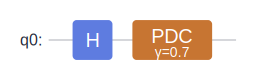

In [13]:
from mindquantum.core.gates import PhaseDampingChannel

circ3 = Circuit()
circ3 += H.on(0)
circ3 += PhaseDampingChannel(0.7).on(0)
circ3.svg()

In [14]:
# Evolve the circuit 5 times and print the quantum state
for i in range(5):
    sim.reset()                 # Initialize the simulator
    sim.apply_circuit(circ3)    # Evolve the circuit
    print(sim.get_qs(ket=True)) # Get the quantum state
    print()

0.8770580193070293¦0⟩
0.4803844614152615¦1⟩

1¦1⟩

0.8770580193070293¦0⟩
0.4803844614152615¦1⟩

1¦1⟩

0.8770580193070293¦0⟩
0.4803844614152615¦1⟩



Similar to the amplitude damping channel, the phase damping channel acts on the superposition $|\psi\rangle=|0\rangle+|1\rangle$ state and also turns it into a mixed state, where one part of the mixed state is the $|1\rangle$ state and the other part is still the superposition state, but the amplitude of the $|1\rangle$ state is decayed. The proportion of this mixed state is determined by both the initial quantum state and the dissipation factor $\gamma$. The larger the amplitude of the $|1\rangle$ state in the initial quantum state, the larger the proportion of the $|1\rangle$ state in the mixed state.

Specifically, for the initial quantum state $|\psi'\rangle=a|0\rangle+b|1\rangle$, the probability of becoming a $|1\rangle$ state after the action of the phase damping channel is $p=\gamma b^2$, or becoming a superposition state $|\psi'\rangle=\frac{1}{\sqrt{1-\gamma b^{2}}}(a|0\rangle+b\sqrt{1-\gamma}|1\rangle)$ with probability $(1-p)$.

This shows that the qubits do not lose energy after passing through the phase damping channel, but the quantum information (embodied here as quantum state superposition) is lost.

## Example Demonstration——Noisy QAOA

Quantum Approximate Optimization Algorithm uses a quantum computer to approximate the solution of combinatorial optimization problems. A detailed introduction can be found in the lesson plan [quantum_approximate_optimization_algorithm.ipynb](https://mindspore.cn/mindquantum/docs/zh-CN/master/quantum_approximate_optimization_algorithm.html). Here we use this algorithm as a case study to see how the introduction of noise affects the quantum algorithm. We keep in line with the QAOA lesson plan and solve the Max-Cut problem for the same graph.

Since the current simulator uses Monte Carlo method to simulate the noise, the result of each evolving circuit has randomness, similar to the real quantum computer, but it also needs to sample and analyze the statistical results several times, i.e., the circuit needs to be re-evolved before each calculation of the expected value of the Hamiltonian. The Nelder-Mead method can obtain the minimum of the multivariate scalar function, and here we use it to optimize the circuit to get the minimum of the expected value of the target Hamiltonian.

max cut: 4.598950770188524


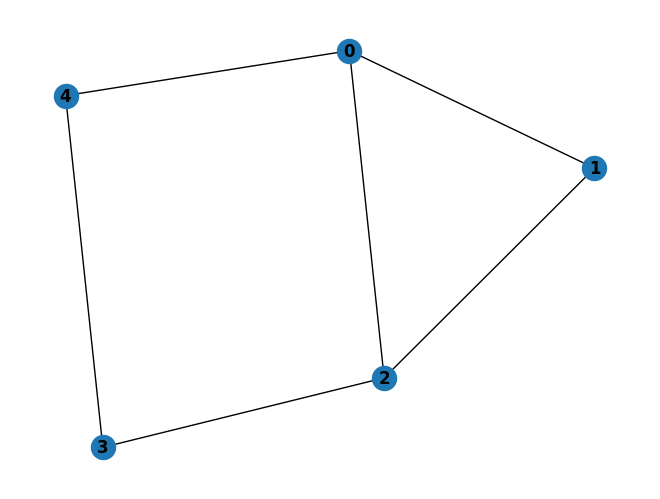

In [15]:
from mindquantum.core.circuit import Circuit, UN
from mindquantum.core.gates import H, RX, Rzz, AmplitudeDampingChannel
from mindquantum.core.operators import Hamiltonian, QubitOperator
from mindquantum.simulator import Simulator
from scipy.optimize import minimize
import networkx as nx
import mindspore as ms
ms.set_context(mode=ms.PYNATIVE_MODE, device_target="CPU")

# Generate the graph to be solved
g = nx.Graph()
nx.add_path(g, [0, 1])
nx.add_path(g, [1, 2])
nx.add_path(g, [2, 3])
nx.add_path(g, [3, 4])
nx.add_path(g, [0, 4])
nx.add_path(g, [0, 2])
nx.draw(g, with_labels=True, font_weight='bold')

gamma = 0.005                                        # Set the dissipation factor of the amplitude damping channel
circ = Circuit(UN(H, g.nodes))                       # Generate the uniform superposition state
circ += UN(AmplitudeDampingChannel(gamma), g.nodes)  # Assume that noise occurs after each H gate action

# Generate the ansatz circuit. See the QAOA lesson plan for detailed principles
for i in range(4):
    for j in g.edges:
        circ += Rzz(f'g{i}').on(j)                    # Act a ZZ gate on each edge of the graph
    circ.barrier(False)
    for j in g.nodes:
        circ += RX(f'b{i}').on(j)                    # Act an RX gate on each node
        circ += AmplitudeDampingChannel(gamma).on(j) # Assume that noise occurs after each RX gate action
    circ.barrier(False)

# Generate the Hamiltonian
ham = QubitOperator()
for i in g.edges:
    ham += QubitOperator(f'Z{i[0]} Z{i[1]}')
ham = Hamiltonian(ham)

sim = Simulator('mqvector', circ.n_qubits)           # Initialize the simulator

# Define the function to be optimized and re-evolve the circuit each time due to the presence of noise
def func(x):
    sim.reset()                                      # Reset the simulator
    sim.apply_circuit(circ, x)                       # Evolve the circuit. x is the circuit parameter value generated by the optimizer
    f = sim.get_expectation(ham).real                # Calculate and return the expected value of the Hamiltonian
    return f

# Set the initial values of the circuit parameters
n_paras = len(circ.params_name)
init_amp = [0.0 for i in range(n_paras)]

res = minimize(func, init_amp, method='nelder-mead') # Optimize the parameters by the optimizer, to get the minimum value of the expected value of the Hamiltonian. The optimization method is nelder-mead
cut = (len(g.edges) - res.fun) / 2                   # Calculate max-cut number
print('max cut:', cut)                               # Print the results

From the results, it can be seen that under the influence of noise, the QAOA algorithm's results deteriorate, but when the dissipation coefficient is not high, it can still converge to a close result.

In [16]:
from mindquantum.utils.show_info import InfoTable

InfoTable('mindquantum', 'scipy', 'numpy')

Software,Version
mindquantum,0.9.0
scipy,1.10.1
numpy,1.23.5
System,Info
Python,3.8.17
OS,Windows AMD64
Memory,8.39 GB
CPU Max Thread,8
Date,Mon Sep 18 14:20:49 2023
